In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 250)

### Base LR model with only ZRI from the previous year

In [3]:
full = pd.read_csv('model_data.csv')

In [5]:
X_zri_test = full.loc[full['year_x']==2017][['ZRI_1yr_ago']]
y_zri_test = full.loc[full['year_x']==2017]['ZRI']

In [6]:
X_zri_train = full.loc[full['year_x']!=2017][['ZRI_1yr_ago']]
y_zri_train = full.loc[full['year_x']!=2017]['ZRI']

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_zri_train, y_zri_train)
lm.score(X_zri_train, y_zri_train)

0.9871022030170161

In [8]:
lm.score(X_zri_test, y_zri_test)

0.9844745451826197

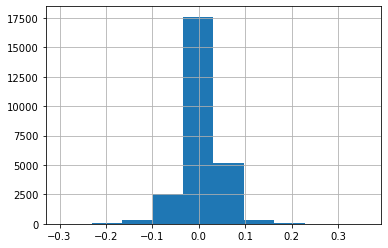

In [9]:
(lm.predict(X_zri_test) - y_zri_test).hist()

In [10]:
import statsmodels.api as sm
x = sm.add_constant(X_zri_train)
model = sm.OLS(y_zri_train, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.005e+06
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:45:52   Log-Likelihood:             1.4568e+05
No. Observations:               78468   AIC:                        -2.914e+05
Df Residuals:                   78466   BIC:                        -2.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1785      0.003     60.204      

### Base LR model 2 with only ZRI from the previous year, Month, and Metro 

In [11]:
full.head(1)

,index_x,year_x,state,Metro,Month,ZRI,occupation_management_arts,num_return_w_ordinary_dividends,no_car,ZRI_1yr_ago,high_income,avg_income,num_return_w_qualify_dividends,bachelors_degree,num_retur_w_state_local_tax,paid_prep,taxable_intrest_amt,median_year_structure_built,white_pop,bachelors_degree_or_higher_25_64,housing_units,tot_income_amt,housing_units_renter_occupied,adj_gross_income,aggregate_travel_time_to_work,owner_occupied_housing_units_median_value,dwellings_2_units
0,2019-10025,2017,NY,New York-Newark-Jersey City,12,8.251925,0.355237,0.390584,0.32912,8.113307,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655


In [14]:
dummy_test = full.loc[full['year_x']==2017][['ZRI_1yr_ago','Metro','Month']]
dummy_train = full.loc[full['year_x']!=2017][['ZRI_1yr_ago','Metro','Month']]

In [15]:
def dummify_df(df,dummy_cols):

    df2 = df.copy()
    for col in dummy_cols:
        col_df = pd.get_dummies(df2[col].astype(object),prefix=col, prefix_sep='_').drop(col+'_'+str(df2[col].mode()[0]),axis=1)
        df2 = pd.concat([df2, col_df], join='inner',axis=1)
        df2.drop(col, axis=1, inplace=True)
    
    return df2

In [17]:
dummy_test_d = dummify_df(dummy_test,['Month','Metro'])
dummy_train_d = dummify_df(dummy_train,['Month','Metro'])

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(dummy_train_d, y_zri_train)
lm.score(dummy_train_d, y_zri_train)

0.9887925710090733

In [21]:
lm.score(dummy_test_d, y_zri_test)

0.9849799410657645

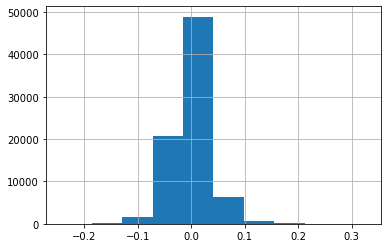

In [22]:
(lm.predict(dummy_train_d) - y_zri_train).hist()

In [23]:
import statsmodels.api as sm
x = sm.add_constant(dummy_train_d)
model = sm.OLS(y_zri_train, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.461e+05
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:05:36   Log-Likelihood:             1.5119e+05
No. Observations:               78468   AIC:                        -3.023e+05
Df Residuals:                   78447   BIC:                        -3.021e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Multiple Linear Model with all lasso selected features

In [24]:
selected = pd.read_csv('./model_data.csv')

In [26]:
selected.head(1)

,index_x,year_x,state,Metro,Month,ZRI,occupation_management_arts,num_return_w_ordinary_dividends,no_car,ZRI_1yr_ago,high_income,avg_income,num_return_w_qualify_dividends,bachelors_degree,num_retur_w_state_local_tax,paid_prep,taxable_intrest_amt,median_year_structure_built,white_pop,bachelors_degree_or_higher_25_64,housing_units,tot_income_amt,housing_units_renter_occupied,adj_gross_income,aggregate_travel_time_to_work,owner_occupied_housing_units_median_value,dwellings_2_units
0,2019-10025,2017,NY,New York-Newark-Jersey City,12,8.251925,0.355237,0.390584,0.32912,8.113307,0.341325,0.744895,0.372493,0.22713,0.448561,0.63252,0.43592,-1.882828,0.540569,0.4126,4.958571,5.661359,0.629458,5.623152,0.289158,2.609643,0.003655


In [28]:
select_test_X = selected.loc[selected['year_x']== 2017,].iloc[:,6:]
select_train_X = selected.loc[selected['year_x']!= 2017,].iloc[:,6:]

In [30]:
select_test_y = selected.loc[selected['year_x']== 2017,]['ZRI']
select_train_y = selected.loc[selected['year_x']!= 2017,]['ZRI']

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(select_train_X, select_train_y)
lm.score(select_train_X, select_train_y)

0.9883326472679272

In [32]:
lm.score(select_test_X, select_test_y)

0.9852784690275831

In [33]:
import statsmodels.api as sm
x = sm.add_constant(select_train_X)
model = sm.OLS(select_train_y, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.164e+05
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:13:00   Log-Likelihood:             1.4962e+05
No. Observations:               78468   AIC:                        -2.992e+05
Df Residuals:                   78446   BIC:                        -2.990e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Multiple Linear Model with reduced lasso selected features

In [43]:
reduced = ['dwellings_2_units','bachelors_degree','bachelors_degree_or_higher_25_64','occupation_management_arts']

In [44]:
selected2 = selected.drop(reduced,axis=1)

In [45]:
select_test_X2 = selected2.loc[selected2['year_x']== 2017,].iloc[:,6:]
select_train_X2 = selected2.loc[selected2['year_x']!= 2017,].iloc[:,6:]
select_test_y2 = selected2.loc[selected2['year_x']== 2017,]['ZRI']
select_train_y2 = selected2.loc[selected2['year_x']!= 2017,]['ZRI']

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(select_train_X2, select_train_y2)
lm.score(select_train_X2, select_train_y2)

0.9882959081958729

In [47]:
lm.score(select_test_X2, select_test_y2)

0.9852525455539988

In [48]:
import statsmodels.api as sm
x = sm.add_constant(select_train_X2)
model = sm.OLS(select_train_y2, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.897e+05
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:24:05   Log-Likelihood:             1.4949e+05
No. Observations:               78468   AIC:                        -2.989e+05
Df Residuals:                   78450   BIC:                        -2.988e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### ACS + IRS only Multiple Linear Model

In [67]:
selected3 = selected.drop('ZRI_1yr_ago',axis=1)

In [68]:
select_test_X3 = selected3.loc[selected3['year_x']== 2017,].iloc[:,6:]
select_train_X3 = selected3.loc[selected3['year_x']!= 2017,].iloc[:,6:]
select_test_y3 = selected3.loc[selected3['year_x']== 2017,]['ZRI']
select_train_y3 = selected3.loc[selected3['year_x']!= 2017,]['ZRI']

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(select_train_X3, select_train_y3)
lm.score(select_train_X3, select_train_y3)

0.8310815451912563

In [71]:
lm.score(select_test_X3, select_test_y3)

0.8349233473113957

In [72]:
import statsmodels.api as sm
x = sm.add_constant(select_train_X3)
model = sm.OLS(select_train_y3, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.930e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:39:02   Log-Likelihood:                 44757.
No. Observations:               78468   AIC:                        -8.947e+04
Df Residuals:                   78447   BIC:                        -8.928e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### ACS + IRS only Multiple Linear Model with reduced features

In [73]:
selected4 = selected2.drop('ZRI_1yr_ago',axis=1)

In [74]:
select_test_X4 = selected4.loc[selected4['year_x']== 2017,].iloc[:,6:]
select_train_X4 = selected4.loc[selected4['year_x']!= 2017,].iloc[:,6:]
select_test_y4 = selected4.loc[selected4['year_x']== 2017,]['ZRI']
select_train_y4 = selected4.loc[selected4['year_x']!= 2017,]['ZRI']

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(select_train_X4, select_train_y4)
lm.score(select_train_X4, select_train_y4)

0.8149777934836113

In [76]:
lm.score(select_test_X4, select_test_y4)

0.8267969818586844

In [77]:
import statsmodels.api as sm
x = sm.add_constant(select_train_X4)
model = sm.OLS(select_train_y4, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 2.160e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:41:34   Log-Likelihood:                 41185.
No. Observations:               78468   AIC:                        -8.234e+04
Df Residuals:                   78451   BIC:                        -8.218e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------